In [ ]:
### CSC 592 Introduction to Data Science Lab-01

#### Submitted by:

#### Name: Md Kausar Hamid Miji
#### Student ID: 101114993 and 
#### Graduate Student: Computer Science and Engineering
#### and
#### Name: Md Niamul Quader
#### Student ID: 101098310
#### Graduate Student: Mechanical Engineering

# Work through example together

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [9]:
import numpy as np
import tensorflow as tf

In [10]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

#### What's the primary difference between these two?
##### Answer: For negative samples, the center of the distribution is defined by the mean which is vector, mean = [0, 3]. On the otherhand, For positive samples, the center of the distribution is defined by the vector. mean = [3, 0]. Both of them are in (x,y) plane.

#### What do we expect the data to look like?
##### Answer: Both samples have covariance matrices so their distributions are not circular type. Their distribution has rotation along the x,y axis and data has been stretched (like an ellipses).

In [11]:
print(positive_samples.shape)
print(negative_samples.shape)

(1000, 2)
(1000, 2)


**Stacking the two classes into an array with shape (2000, 2)**

In [12]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#### What type of argument does 'vstack' take?
##### Answer: The vstack() function is used to stack arrays in sequence vertically (row wise). vstack takes tuple as argument.
#### What shape is this?
##### Answer: (2000,2).
#### What's on the 0th axis?
##### Answer: 0th (1st) column feature.
#### What's on the 1th axis?
##### Answer: 1st (2nd) column feature.

**Generating the corresponding targets (0 and 1)**

In [13]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

#### What else are targets called?
##### Answer: Targets are called Labels. Here 0 and 1 lebels are assigned.
#### What shape is this? Why?
##### Answer: The shape of the target is (2000, 1). Since our inputs have 2000 samples, their labels will also be 2000, each of them of value either 0 or 1.

**Plotting the two point classes**

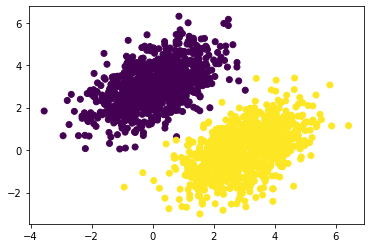

In [14]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

#### How did we deal with color here?
##### Answer: 

**Creating the linear classifier variables**

In [15]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W)
print(b)
# Why'd we define W and b as tf.Variables?

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.32588995],
       [0.9362347 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


**The forward pass function**

In [16]:
def model(inputs):
    return tf.matmul(inputs, W) + b

# What does our model actually look like as a surface above feature space?
# Does the order of the matmul parameters matter?

**The mean squared error loss function**

In [17]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# What does reduce_mean do?
# Does the axis we reduce along matter?
# There's no square root - does that change the shape of the loss surface?  
# Does that change the location to the maxima/minima?

**The training step function**

In [18]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
        # print(type(predictions)) # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [19]:
# What does learning rate control?
# What are the variable types of inputs, targets, and predictions?
# The inputs, targets and predictions are of rank 1 tensor with dimension (2000,1).
# Why do we care about the gradients of W and b?

**The batch training loop**

Loss at step 0: 0.0246
Loss at step 1: 0.0246
Loss at step 2: 0.0245
Loss at step 3: 0.0245
Loss at step 4: 0.0245
Loss at step 5: 0.0245
Loss at step 6: 0.0245
Loss at step 7: 0.0245
Loss at step 8: 0.0245
Loss at step 9: 0.0245
Loss at step 10: 0.0245
Loss at step 11: 0.0245
Loss at step 12: 0.0245
Loss at step 13: 0.0245
Loss at step 14: 0.0245
Loss at step 15: 0.0245
Loss at step 16: 0.0245
Loss at step 17: 0.0245
Loss at step 18: 0.0245
Loss at step 19: 0.0245
Loss at step 20: 0.0245
Loss at step 21: 0.0245
Loss at step 22: 0.0245
Loss at step 23: 0.0245
Loss at step 24: 0.0245
Loss at step 25: 0.0245
Loss at step 26: 0.0245
Loss at step 27: 0.0245
Loss at step 28: 0.0245
Loss at step 29: 0.0245
Loss at step 30: 0.0245
Loss at step 31: 0.0245
Loss at step 32: 0.0245
Loss at step 33: 0.0245
Loss at step 34: 0.0245
Loss at step 35: 0.0245
Loss at step 36: 0.0245
Loss at step 37: 0.0245
Loss at step 38: 0.0245
Loss at step 39: 0.0245


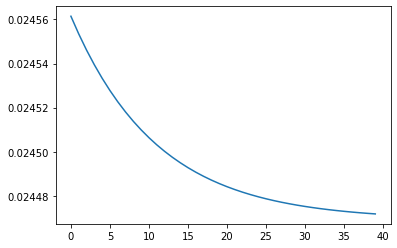

In [25]:
L = []
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")
    L.append(loss)
plt.plot(L)

In [21]:
# What happens if we run this fewer times?
# Answer: We will not reach to the local minima.
# Try to modify this to plot the loss

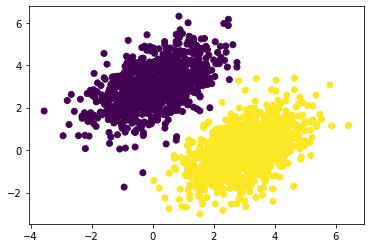

In [22]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()
# How would we expect this to change if the two labels were 1 and 2 (instead of 0 and 1)?
# Color the entire regions of each class in the square (so not just the input data points).  Hint (np.meshgrid())
# Try changing the model to include 2nd degree terms (e.g. W0*x + W1*y + W2*x**2 + W3*y**2 + b).

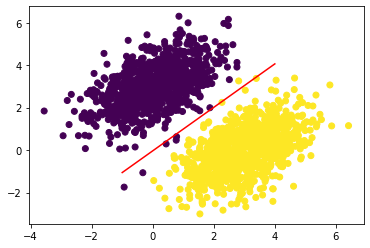

In [26]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
X,Y = np.meshgrid(x,y)

plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)